In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Bar Charts ##

In [3]:
# Highest grossing movies as of 2017
# Read in table called 'top_movies_2017.csv'
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [4]:
# Convert Gross (Adjusted) to millions of dollars for readability
millions = top10_adjusted.column('Gross (Adjusted)') / 1000000
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


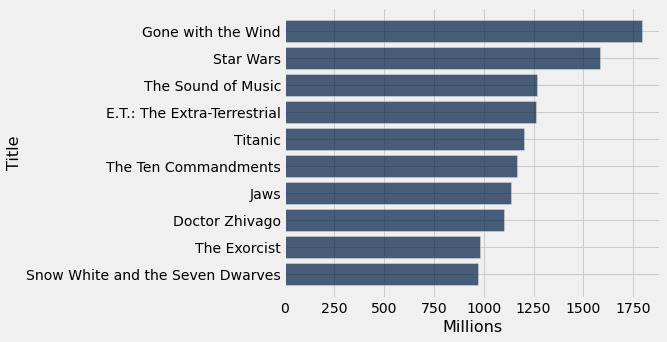

In [5]:
top10_adjusted.barh('Title', 'Millions')

### How many movies did each studio produce?

In [6]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [8]:
top_movies.where("Studio", "MGM").num_rows

7

##### Method 1: Run lots of manual `where` searches

In [10]:
# print where and then top rows
print(top_movies.where("Studio", "MGM").num_rows)
print(top_movies.where("Studio", "Disney").num_rows)
print(top_movies.where("Studio", "Warner Brothers").num_rows)
print(top_movies.where("Studio", "Universal").num_rows)

7
11
29
23


##### Method 2: Automatic group by the column

In [11]:
# Let's group the table top10_adjusted by the studio
top_movies.group('Studio')

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


Let's look at all 24 studios

In [12]:
top_movies.group('Studio').show()

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


Let's look at the distribution of these studios using a plot

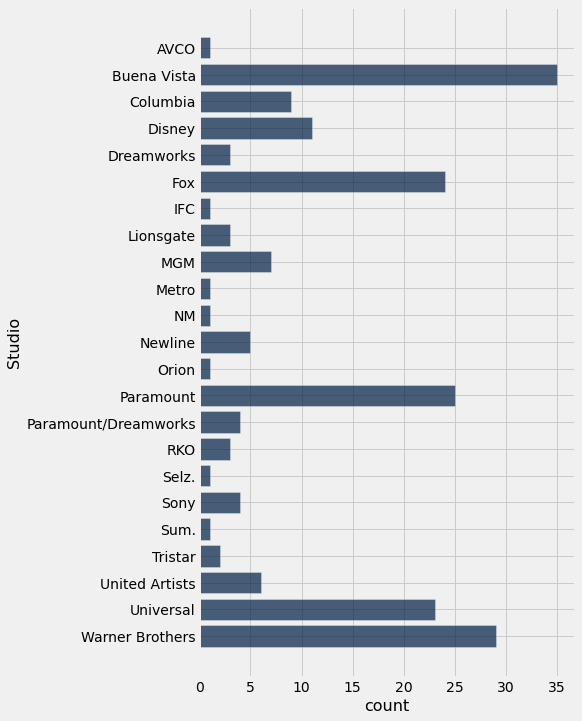

In [14]:
# Remember barh
top_movies.group('Studio').barh('Studio')

Let's look at the order of the studios? Can we learn anything from this ordering?

In [ ]:
# No code here

So, let's show the distribution but re-ordering the categories based on the number of movies

*Hint: use the column count*

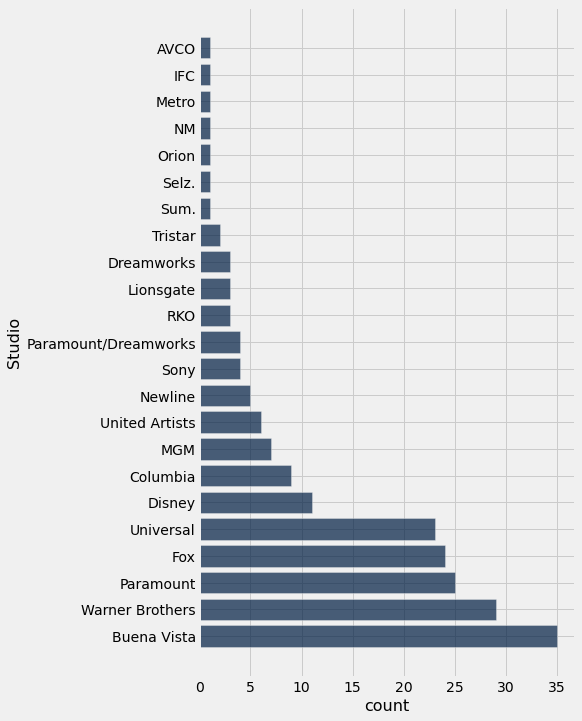

In [18]:
top_movies.group('Studio').sort('count').barh('Studio')

In [ ]:
# Jump back to slides

# Bins

In [4]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


#### Let's look at ages

In [11]:
## Compute the ages of the movie (assuming this is from 2017) and add it as a column
age = 2017 - top_movies.column("Year")
top_movies = top_movies.with_column('age', age)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,age
Gone with the Wind,MGM,198676459,1796176700,1939,78
Star Wars,Fox,460998007,1583483200,1977,40
The Sound of Music,Fox,158671368,1266072700,1965,52
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,35
Titanic,Paramount,658672302,1204368000,1997,20
The Ten Commandments,Paramount,65500000,1164590000,1956,61
Jaws,Universal,260000000,1138620700,1975,42
Doctor Zhivago,MGM,111721910,1103564200,1965,52
The Exorcist,Warner Brothers,232906145,983226600,1973,44
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,80


Its a good idea to get a sense of the values in our new column. 

Lets look at the min and max ages

In [13]:
min(top_movies.column('age')), max(top_movies.column('age'))

(0, 96)

In [16]:
top_movies.where('age', 96)

Title,Studio,Gross,Gross (Adjusted),Year,age
The Four Horsemen of the Apocalypse,Metro,9183673,408214300,1921,96


### Now let's choose our bins, but we care more about recent movies (make later intervals bigger)

In [28]:
## make an array of our bins
#my_bins = make_array(5, 10, 15, 20, 25, 30, ..., 90) # Add bins here
#my_bins = np.arange(5, 95, 5)
my_bins = make_array(0, 5, 10, 15, 25, 50, 100)
my_bins

array([  0,   5,  10,  15,  25,  50, 100])

In [29]:
top_movies.bin('age', bins=my_bins)

bin,age count
0,25
5,16
10,20
15,36
25,64
50,39
100,0


In [25]:
top_movies.where('age', are.below(5)).num_rows

25

In [27]:
top_movies.where('age', are.between(5, 10)).num_rows

16

In [ ]:
# back to slides

# Histograms

In [23]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,age
Gone with the Wind,MGM,198676459,1796176700,1939,78
Star Wars,Fox,460998007,1583483200,1977,40
The Sound of Music,Fox,158671368,1266072700,1965,52
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,35
Titanic,Paramount,658672302,1204368000,1997,20
The Ten Commandments,Paramount,65500000,1164590000,1956,61
Jaws,Universal,260000000,1138620700,1975,42
Doctor Zhivago,MGM,111721910,1103564200,1965,52
The Exorcist,Warner Brothers,232906145,983226600,1973,44
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,80


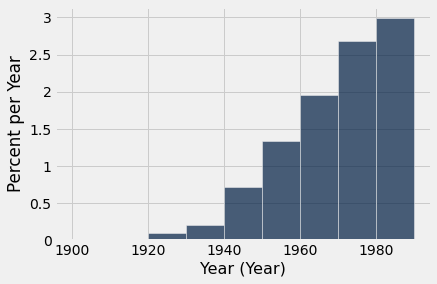

In [24]:
top_movies.hist('Year', unit="Year", bins=np.arange(1900, 2000, 10))

**QUESTION:** what is the y-axis here?

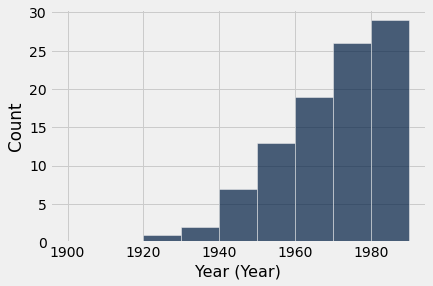

In [30]:
# lets use normed=False
top_movies.hist('Year', unit="Year", bins=np.arange(1900, 2000, 10), normed=False)

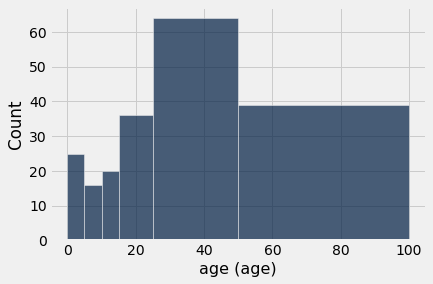

In [37]:
top_movies.hist('age', unit='age', bins=my_bins, normed=False)

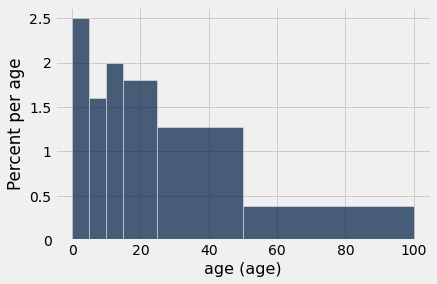

In [38]:
top_movies.hist('age', unit='age', bins=my_bins)

In [41]:
top_movies.num_rows
(25 / 200) / 5

0.025

In [44]:
2.5 * 5, (25 / 200) * 100

(12.5, 12.5)

In [33]:
top_movies.bin('age', bins=my_bins)

bin,age count
0,25
5,16
10,20
15,36
25,64
50,39
100,0


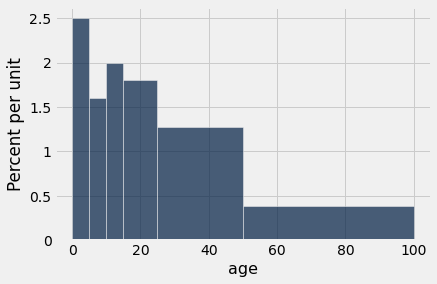

In [49]:
top_movies.hist('age', bins=my_bins)

In [ ]:
## Look at narrow bins now

(jump to slides)
# Functions

In [58]:
def spread(values):
    spread_val = max(values) - min(values)
    return spread_val


In [50]:
def f(s):
    return np.round(s / sum(s) * 100, 2)



In [51]:
f(make_array(1,2,3,4))

array([10., 20., 30., 40.])

In [53]:
s = make_array(1,2,3,4)
sum(s)

10

In [54]:
s / 10

array([0.1, 0.2, 0.3, 0.4])

In [59]:
spread(s)

3

In [61]:
abs(-3), abs(4.5)

(3, 4.5)

In [ ]:
#def abs(input_number):
    # BODY THAT CONVERS NUMBER TO ABS number
    # RETURN THAT VALUE

In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()
grader.export("Lecture_6_completed.ipynb", pdf=False)

There was an error generating your LaTeX
Showing concise error message
This is BibTeX, Version 0.99d (TeX Live 2017/Debian)
The top-level auxiliary file: ./notebook.aux
I found no \citation commands---while reading file ./notebook.aux
I found no \bibdata command---while reading file ./notebook.aux
I found no \bibstyle command---while reading file ./notebook.aux
(There were 3 error messages)



FileNotFoundError: [Errno 2] No such file or directory: 'Lecture_6_completed.pdf'